# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print(os.getcwd())

/Users/raju/Vault/Data Science/Portfolio/Guided Capstone


**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [2]:
df = pd.read_csv('data/step2_output.csv', index_col=0)

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.50,7806.000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.50,1800.000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.50,6325.250,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.00,0.000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.00,0.000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.00,0.000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.00,1.000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.00,1.000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.00,2.000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.00,3.000,14.0


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

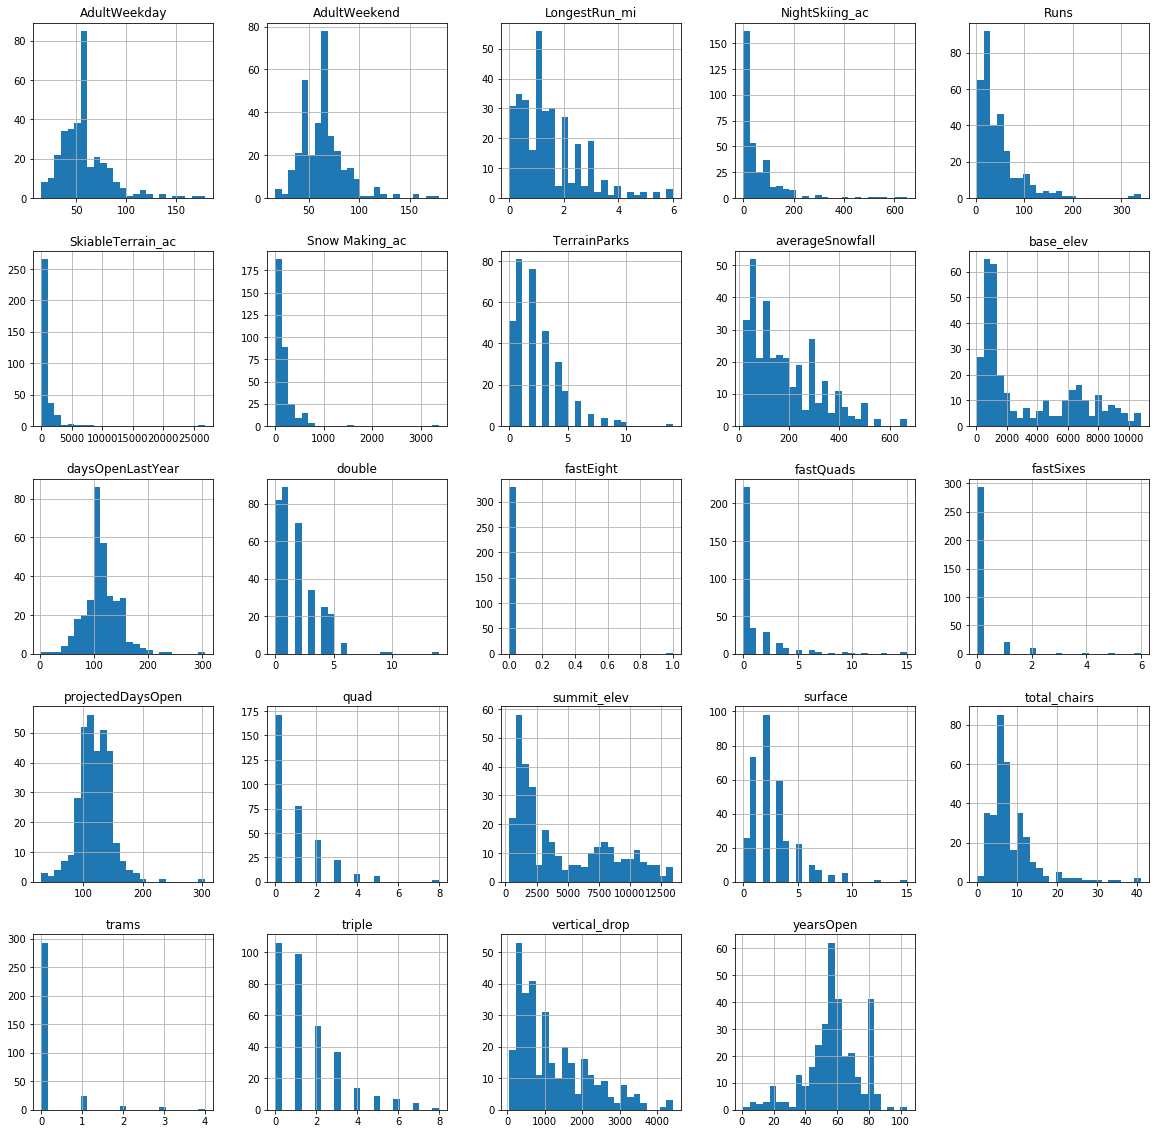

In [4]:
hist = df.hist(bins=25, figsize=(20,20))

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

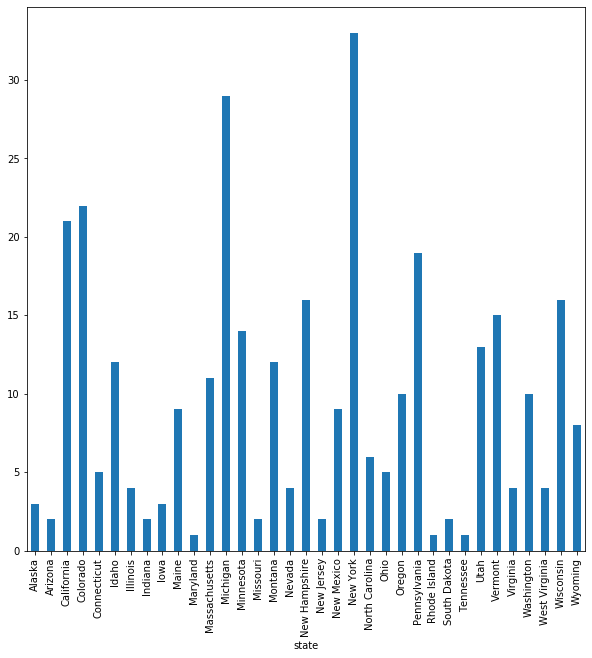

In [5]:
state_bar = df.groupby('state')['Name'].agg('count').plot(kind='bar', figsize=(10,10))

**<font color='teal'>Region Levels Plot</font>**

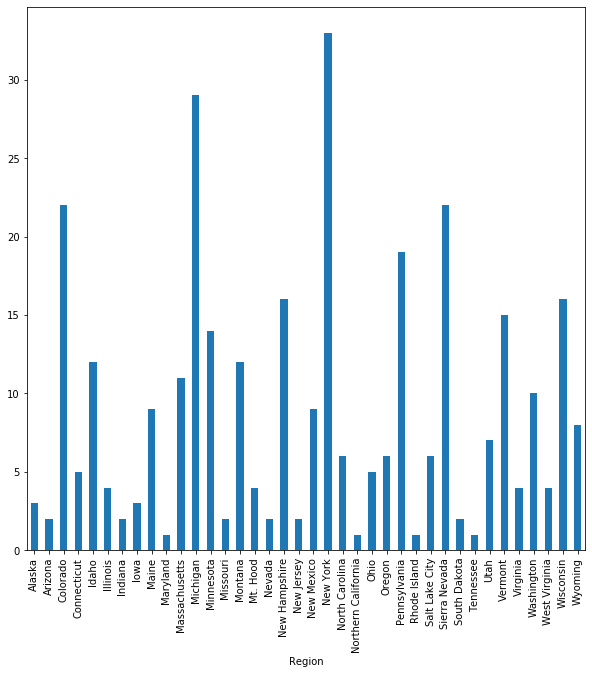

In [6]:
region_bar = df.groupby('Region')['Name'].agg('count').plot(kind='bar', figsize=(10,10))

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [7]:
df = df.drop('Region', axis='columns')

## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

In [8]:
elevation = ['summit_elev', 'base_elev', 'vertical_drop']
acreage = ['SkiableTerrain_ac', 'Snow Making_ac', 'NightSkiing_ac']
days_years = ['daysOpenLastYear', 'projectedDaysOpen', 'yearsOpen']
prices = ['AdultWeekday', 'AdultWeekend']
lifts = ['trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface', 'total_chairs']
other = ['Runs', 'TerrainParks']
run_mi = ['LongestRun_mi']

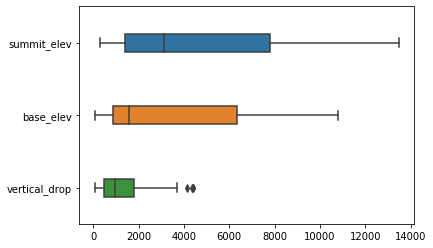

In [9]:
box = sns.boxplot(data=df[elevation], orient='h', width=0.25)

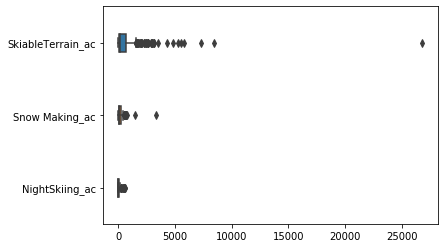

In [10]:
box = sns.boxplot(data=df[acreage], orient='h', width=0.25)

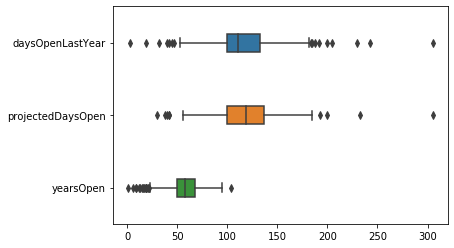

In [11]:
box = sns.boxplot(data=df[days_years], orient='h', width=0.25)

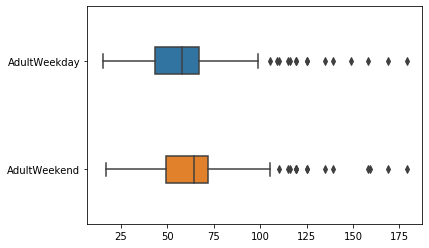

In [12]:
box = sns.boxplot(data=df[prices], orient='h', width=0.25)

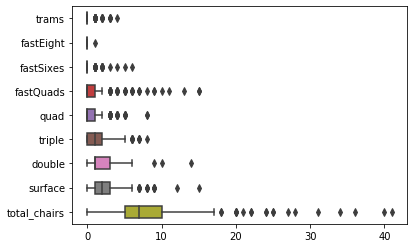

In [13]:
box = sns.boxplot(data=df[lifts], orient='h', width=0.5)

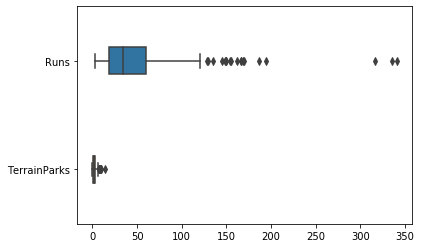

In [14]:
box = sns.boxplot(data=df[other], orient='h', width=0.25)

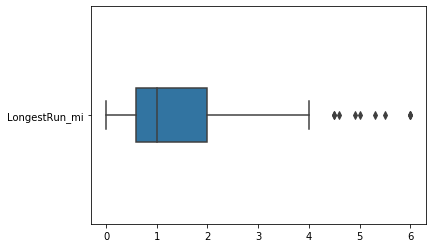

In [15]:
box = sns.boxplot(data=df[run_mi], orient='h', width=0.25)

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

Let's look at both the  Z-score and IQR to identify outliers in each case.

In [16]:
z_scores = np.abs(stats.zscore(df.iloc[:,2:]))
df_z_outliers = df[(z_scores > 3).any(axis=1)]
df_z_outliers

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0,0,2,2,...,1.0,1610.0,113.0,150,60,669.0,65.00,85.00,150,550.0
6,Bear Mountain,California,8805,1665,7140,0,0,0,2,1,...,1.5,198.0,198.0,122,76,100.0,57.92,64.17,130,0.0
11,Heavenly Mountain Resort,California,10067,3500,7170,2,0,2,7,1,...,5.5,4800.0,3379.0,155,64,360.0,57.92,64.17,157,0.0
14,Mammoth Mountain Ski Area,California,11053,3100,7953,3,0,2,9,1,...,3.0,3500.0,700.0,243,66,400.0,149.00,159.00,147,0.0
18,Northstar California,California,8610,2280,6330,2,0,1,7,1,...,1.4,3170.0,1500.0,135,47,350.0,57.92,64.17,150,0.0
26,Arapahoe Basin Ski Area,Colorado,13050,2530,10780,0,0,0,1,2,...,1.5,1428.0,125.0,230,73,350.0,85.00,85.00,233,0.0
27,Aspen / Snowmass,Colorado,12510,4406,8104,3,0,1,15,4,...,5.3,5517.0,658.0,138,72,300.0,179.00,179.00,138,0.0
28,Beaver Creek,Colorado,11440,3340,8100,2,0,0,11,0,...,2.8,1832.0,650.0,145,39,323.0,57.92,64.17,138,0.0
29,Breckenridge,Colorado,12998,3398,9600,1,0,5,6,0,...,3.5,2908.0,600.0,182,58,300.0,57.92,64.17,163,0.0
30,Copper Mountain Resort,Colorado,12313,2738,9712,1,0,2,4,0,...,1.7,2527.0,364.0,164,47,300.0,158.00,158.00,164,0.0


In [17]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df_iqr_outliers = df[((df < (q1 - iqr)) | (df > (q3 + iqr))).any(axis=1)]
df_iqr_outliers

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0,0,2,2,...,1.0,1610.0,113.0,150,60,669.0,65.00,85.00,150,550.0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0,0,0,0,...,2.0,640.0,60.0,45,44,350.0,47.00,53.00,90,0.0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0,1,0,2,...,2.0,777.0,104.0,122,81,260.0,89.00,89.00,122,0.0
6,Bear Mountain,California,8805,1665,7140,0,0,0,2,1,...,1.5,198.0,198.0,122,76,100.0,57.92,64.17,130,0.0
7,Bear Valley,California,8500,1900,6600,0,0,1,1,0,...,1.2,1680.0,100.0,165,52,359.0,57.92,64.17,151,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Wilmot Mountain,Wisconsin,1030,230,800,0,0,0,0,3,...,0.5,135.0,135.0,125,81,70.0,56.00,66.00,139,135.0
322,Grand Targhee Resort,Wyoming,9920,2270,7851,0,0,0,2,2,...,2.7,2602.0,105.0,152,50,500.0,90.00,90.00,152,0.0
324,Jackson Hole,Wyoming,10450,4139,6311,3,0,0,4,4,...,4.5,2500.0,195.0,130,54,459.0,57.92,64.17,133,0.0
325,Meadowlark Ski Lodge,Wyoming,9500,1000,8500,0,0,0,0,0,...,1.5,300.0,105.0,119,9,292.7,57.92,64.17,116,0.0


We'll use interquartile range to drop outliers.

In [18]:
df = df[~((df < (q1 - iqr)) | (df > (q3 + iqr))).any(axis=1)]

There are many possible response variables you could have identified during Step 1 of the guided capstone. However, for the rest of this guided capstone project, you will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, you need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, you'll want to predict the number of days the mountain is open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

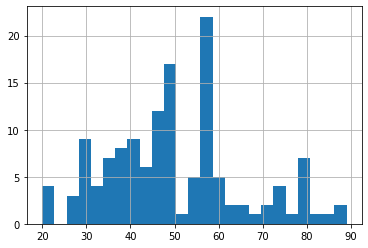

In [19]:
hist = df['AdultWeekday'].hist(bins=25)

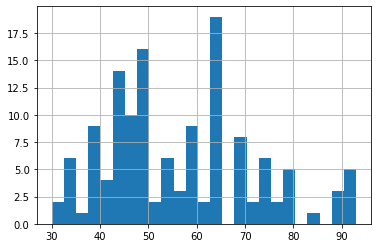

In [20]:
hist = df['AdultWeekend'].hist(bins=25)

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

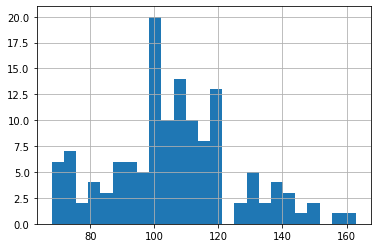

In [21]:
hist = df['daysOpenLastYear'].hist(bins=25)

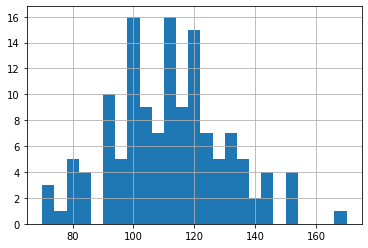

In [22]:
hist = df['projectedDaysOpen'].hist(bins=25)

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

In [23]:
response_vars = ['AdultWeekday', 'AdultWeekend', 'daysOpenLastYear', 'projectedDaysOpen']
features = ['summit_elev', 'base_elev', 'vertical_drop', 'SkiableTerrain_ac', 'Snow Making_ac', 'NightSkiing_ac', 'yearsOpen', 'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi']

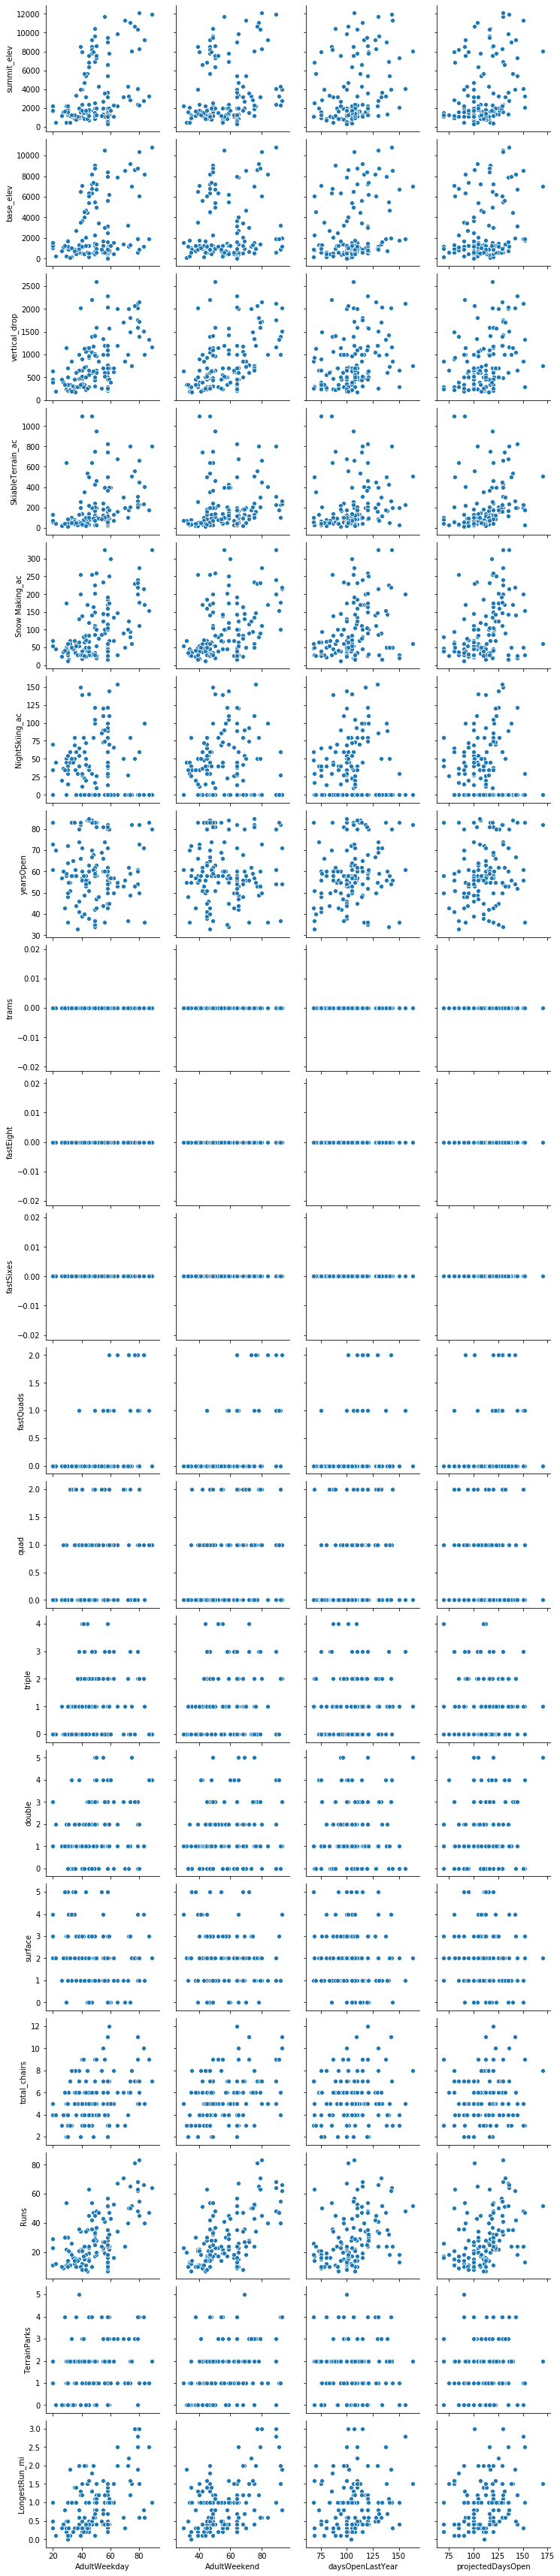

In [24]:
pplot = sns.pairplot(df, x_vars=response_vars, y_vars=features)

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

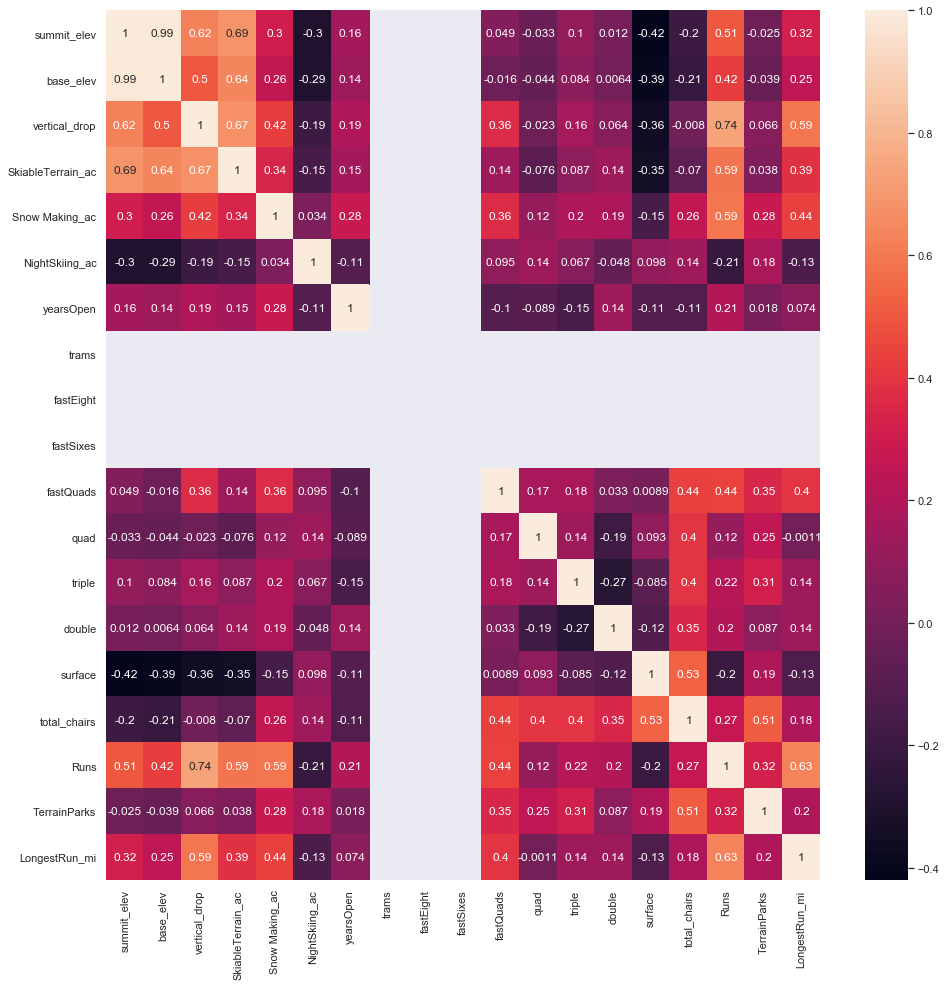

In [25]:
sns.set(rc={'figure.figsize':(16,16)})
corr = df[features].corr()
heatmap = sns.heatmap(corr, annot=True)

When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [26]:
df = df.drop(['base_elev', 'trams', 'fastEight', 'fastSixes'], axis='columns')

Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [27]:
from sklearn.cluster import KMeans
x = df.drop(['Name','state'], axis='columns').values

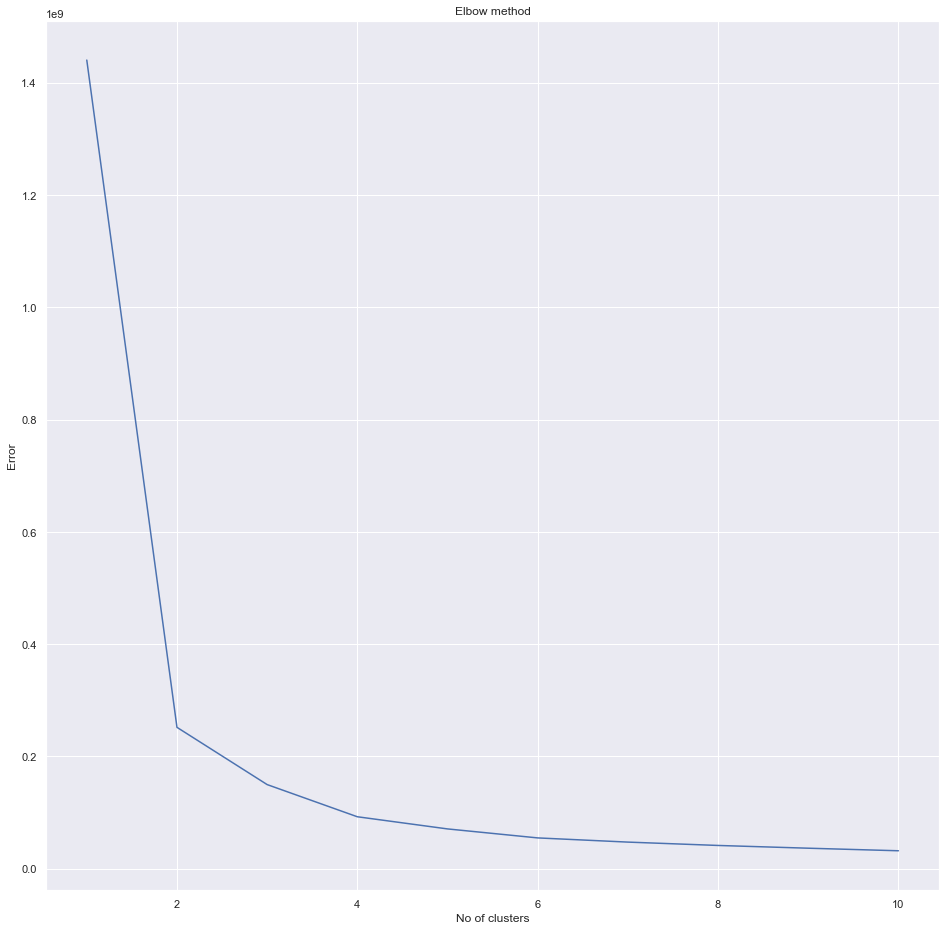

In [28]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

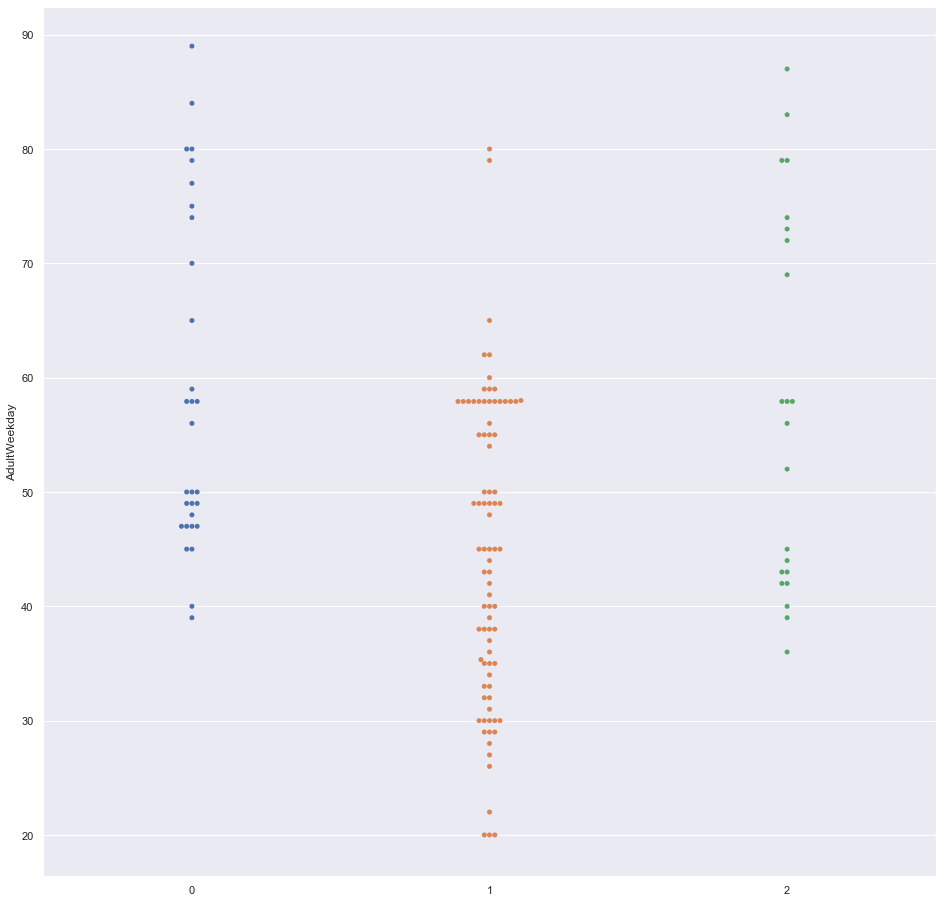

In [29]:
clusters = KMeans(n_clusters=3, random_state=0).fit(x)
sns.swarmplot(clusters.labels_,df.AdultWeekday)

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [30]:
df['cluster'] = clusters.labels_

In [31]:
df.to_csv('data/step3_output.csv')